<a href="https://colab.research.google.com/github/Caio-Henriquee/Analise_brasileirao_pandas/blob/main/Analise_brasileirao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/content/drive/MyDrive/dataset/brasileirao/campeonato-brasileiro-full.csv")

In [3]:
colunas_excluir = ['formacao_mandante',	'formacao_visitante'	,'tecnico_mandante',	'tecnico_visitante']
df = df.drop(colunas_excluir, axis=1) #limpando o dataset com informacoes que nao serao necessarias

In [4]:
df.head()

,ID,rodata,data,hora,mandante,visitante,vencedor,arena,mandante_Placar,visitante_Placar,mandante_Estado,visitante_Estado
0,1,1,29/03/2003,16:00,Guarani,Vasco,Guarani,Brinco de Ouro,4,2,SP,RJ
1,2,1,29/03/2003,16:00,Athletico-PR,Gremio,Athletico-PR,Arena da Baixada,2,0,PR,RS
2,3,1,30/03/2003,16:00,Flamengo,Coritiba,-,Maracanã,1,1,RJ,PR
3,4,1,30/03/2003,16:00,Goias,Paysandu,-,Serra Dourada,2,2,GO,PA
4,5,1,30/03/2003,16:00,Internacional,Ponte Preta,-,Beira Rio,1,1,RS,SP


In [5]:
df.dtypes

ID                   int64
rodata               int64
data                object
hora                object
mandante            object
visitante           object
vencedor            object
arena               object
mandante_Placar      int64
visitante_Placar     int64
mandante_Estado     object
visitante_Estado    object
dtype: object

In [6]:

df['data'] = pd.to_datetime(df['data']) #converter do tipo object para datatime

<ipython-input-6-e19a0351ddec>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['data'] = pd.to_datetime(df['data']) #converter do tipo object para datatime


In [7]:
plt.style.use("ggplot")

Text(0, 0.5, 'gols')

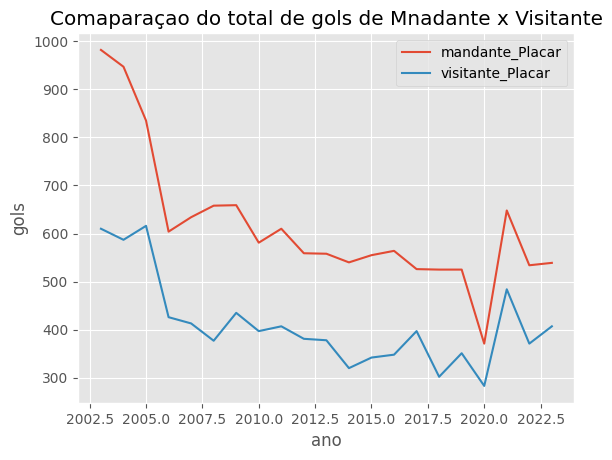

In [8]:
df.groupby(df['data'].dt.year)[['mandante_Placar', 'visitante_Placar']].sum().plot(title ='Comaparaçao do total de gols de Mnadante x Visitante')
plt.xlabel('ano')
plt.ylabel('gols')

In [9]:

df['total_gols'] = df['mandante_Placar'] + df['visitante_Placar'] #criar a nova couluna total de gols


In [10]:
df.head()

,ID,rodata,data,hora,mandante,visitante,vencedor,arena,mandante_Placar,visitante_Placar,mandante_Estado,visitante_Estado,total_gols
0,1,1,2003-03-29,16:00,Guarani,Vasco,Guarani,Brinco de Ouro,4,2,SP,RJ,6
1,2,1,2003-03-29,16:00,Athletico-PR,Gremio,Athletico-PR,Arena da Baixada,2,0,PR,RS,2
2,3,1,2003-03-30,16:00,Flamengo,Coritiba,-,Maracanã,1,1,RJ,PR,2
3,4,1,2003-03-30,16:00,Goias,Paysandu,-,Serra Dourada,2,2,GO,PA,4
4,5,1,2003-03-30,16:00,Internacional,Ponte Preta,-,Beira Rio,1,1,RS,SP,2


In [11]:
plt.style.use('ggplot')

Text(0, 0.5, 'gols')

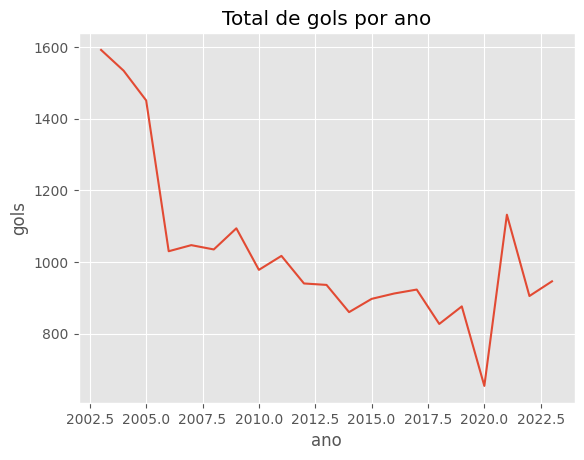

In [12]:
df.groupby(df['data'].dt.year)['total_gols'].sum().plot(title = 'Total de gols por ano')
plt.xlabel('ano')
plt.ylabel('gols')

In [13]:
plt.style.use('ggplot')

In [28]:
numeros_jogos_arenas = df['arena'].value_counts() #fazendo a variavel receber a contaggem de todos os jogos na arena
numeros_jogos_arenas_5 = numeros_jogos_arenas.head(10) #pegar as 10 arenas com mais jogos

Text(0, 0.5, 'Quantidade de jogos')

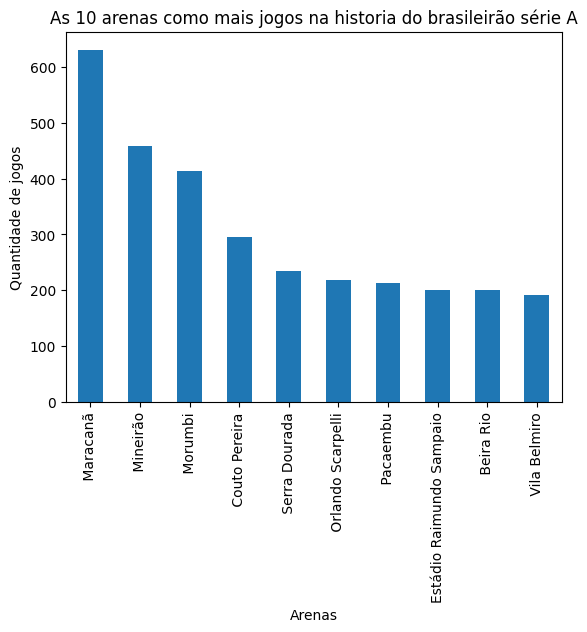

In [30]:
numeros_jogos_arenas_5.plot.bar(title = 'As 10 arenas como mais jogos na historia do brasileirão série A')
plt.xlabel('Arenas')
plt.ylabel('Quantidade de jogos')

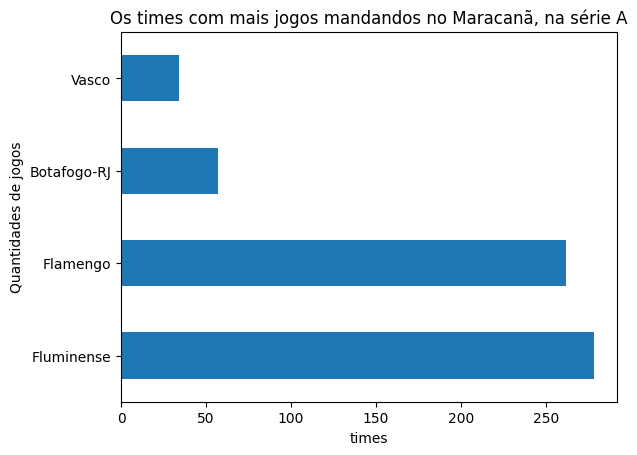

In [65]:

maracana_df = df[df['arena'] == 'maracanã'] #pegando todos os jogos que aconteceram no maracana
maracana_df['mandante'].value_counts().plot.barh(title='Os times com mais jogos mandandos no Maracanã, na série A')
plt.xlabel('times')
plt.ylabel('Quantidades de jogos');

